In [1]:
import pandas as pd
import numpy as np

import string

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashanthsingaravelan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, Embedding, Input, LSTM, Dropout, GlobalMaxPool1D
from tensorflow.keras import Model

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
vocab_size    = 1000
embedding_dim = 16
max_length    = 120
trunc_type    = 'post'
padding_type  = 'post'
oov_tok       = ""
training_portion = .8

In [6]:
## category is present
df_train = pd.read_csv('data-sets/BBC News Train.csv')
df_train.head()

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

In [7]:
## category is not present -> We need to find
df_test  = pd.read_csv('data-sets/BBC News Test.csv')
df_test.head()

ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...

In [ ]:
## Assigning numbers to each and every category
df_train['CategoryId'] = df_train['Category'].factorize()[0]
df_train.head()

In [ ]:
## category name with respect to category-id (ascending order based on CategoryID)
category = df_train[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

In [10]:
def tokenization(text):
    lst=text.split()
    return lst

In [11]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in string.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst

In [12]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in lst:                 ## going sentence by sentence
        for j in  string.digits:  ## operations within a sentence
            i = i.replace(j,'')   ## numbers -> empty
        nodig_lst.append(i)
        
    for i in nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst

In [13]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

In [14]:
def lemmatzation(lst):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    new_lst = []
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst

In [15]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(tokenization)
df_train.iloc[:, 1].head()

0    [worldcom, ex-boss, launches, defence, lawyers...
1    [german, business, confidence, slides, german,...
2    [bbc, poll, indicates, economic, gloom, citize...
3    [lifestyle, governs, mobile, choice, faster, b...
4    [enron, bosses, in, $168m, payout, eighteen, f...
Name: Text, dtype: object

In [15]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(remove_punctuations) 
df_train.iloc[:, 1].head()

0    [w, o, r, l, d, c, o, m,  , e, x, , b, o, s, s...
1    [g, e, r, m, a, n,  , b, u, s, i, n, e, s, s, ...
2    [b, b, c,  , p, o, l, l,  , i, n, d, i, c, a, ...
3    [l, i, f, e, s, t, y, l, e,  ,  , g, o, v, e, ...
4    [e, n, r, o, n,  , b, o, s, s, e, s,  , i, n, ...
Name: Text, dtype: object

In [16]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(remove_numbers) 
df_train.iloc[:, 1].head()

0    [w, o, r, l, d, c, o, m,  , e, x, b, o, s, s, ...
1    [g, e, r, m, a, n,  , b, u, s, i, n, e, s, s, ...
2    [b, b, c,  , p, o, l, l,  , i, n, d, i, c, a, ...
3    [l, i, f, e, s, t, y, l, e,  ,  , g, o, v, e, ...
4    [e, n, r, o, n,  , b, o, s, s, e, s,  , i, n, ...
Name: Text, dtype: object

In [17]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(remove_stopwords) 
print(len(df_train.iloc[:, 1]))

1490


In [18]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(lemmatzation) 
df_train.iloc[:, 1].head()

0    [w, r, l, c,  , e, x, b,  , l, u, n, c, h, e, ...
1    [g, e, r, n,  , b, u, n, e,  , c, n, f, e, n, ...
2    [b, b, c,  , p, l, l,  , n, c, e,  , e, c, n, ...
3    [l, f, e, l, e,  ,  , g, v, e, r, n,  , b, l, ...
4    [e, n, r, n,  , b, e,  , n,  ,  , p, u,  , e, ...
Name: Text, dtype: object

## Split between Dependent and Independent variables

In [15]:
x = df_train['Text']
y = df_train['Category']

In [16]:
print(x)

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object


In [17]:
print(y)

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object


## Y-Variable (Category feature) --> Tokenisation + Vectorizer

In [18]:
lbl = LabelBinarizer()
y = lbl.fit_transform(y) ## category -> label encoding -> vector 

In [28]:
print(y)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

## Split between Train and Test Data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## X-Variable (Category feature) --> Tokenisation + Vectorizer

In [20]:
max_features = 1000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(x))

In [51]:
### tokenisation + vectorization
tokenized_list_train = tokenizer.texts_to_sequences(x_train)
for i in range(4):
    print(tokenized_list_train[i])
    print("\n")

[2, 14, 1, 326, 2, 15, 1, 167, 7, 1, 7, 1, 7, 21, 19, 1, 14, 5, 92, 11, 112, 78, 5, 2, 1, 78, 286, 6, 325, 24, 81, 36, 17, 5, 298, 58, 3, 92, 3, 6, 17, 157, 2, 29, 325, 1, 232, 1, 232, 3, 6, 80, 2, 79, 7, 227, 92, 21, 81, 3, 1, 325, 1]


[9, 24, 2, 3, 1, 14, 13, 56, 55, 155, 232, 1, 8, 3, 20, 3, 1, 87, 294, 86, 58, 79, 2, 330, 5, 59, 24, 3, 6, 232, 1, 155, 6, 24, 81, 3, 1, 155, 2, 41, 332, 92, 325, 3, 252, 63, 90, 1, 8, 80, 2, 92, 227, 3, 1, 7, 1, 19, 80, 5, 2, 15, 309, 18, 189, 23, 20, 150, 2, 2, 325, 9, 41, 3, 1, 320, 1, 24, 15]


[2, 79, 15, 1, 110, 286, 6, 9, 232, 1, 3, 6, 81, 3, 1, 9, 1, 3, 1, 1, 92, 130, 11, 17, 325, 7, 1, 1, 6, 14, 17, 7, 1, 2, 1, 9, 78, 5, 3, 1, 232, 1, 5, 6, 92, 11, 2, 36, 232, 2, 36, 21, 11, 169, 44, 47, 20, 231, 19, 11, 79, 7, 67, 245, 92, 5, 7, 6, 148, 2, 29, 5, 169, 3, 1, 9, 9, 7, 6, 14, 298, 9, 3, 7, 1, 6, 315, 15, 6, 3, 1, 1, 23, 21, 1, 11, 11, 169, 6, 169, 23, 44, 1, 11, 1, 58, 2, 1, 167, 11, 1, 58, 82, 9, 5, 119, 58, 6, 2, 36, 110, 17, 5, 225, 17, 1, 1

In [52]:
tokenized_list_test  = tokenizer.texts_to_sequences(x_test)
for i in range(4):
    print(tokenized_list_test[i])
    print("\n")

[17, 19, 2, 29, 41, 3, 1, 1, 44, 4, 23, 1, 1, 1, 232, 6, 189, 9, 1, 58, 1, 59, 232, 1, 7, 1, 7, 309, 227, 3, 23, 1, 5, 3, 2, 1, 21, 41, 6, 2, 2, 1, 7, 44, 1, 4, 1, 80, 2, 1, 7, 1, 23, 5, 21, 6, 47, 245, 41, 19, 4, 23, 227, 9, 21, 1, 58, 2, 15, 21, 37, 23, 20, 5, 20, 47, 2, 9, 1, 3, 1, 78, 138, 19, 2, 36, 9, 1, 2, 1, 274, 21, 1, 7, 21, 1, 3, 41, 1, 20, 9, 227, 1, 274, 286, 9, 41, 3, 3, 38, 41, 1, 2, 41, 6, 3, 5, 21, 1, 6, 6, 41, 78, 15, 1, 6, 24, 81, 252, 9, 1, 11, 20, 21]


[2, 5, 8, 14, 19, 11, 24, 246, 2, 7, 259, 27, 5, 336, 24, 3, 5, 225, 2, 36, 86, 5, 336, 1, 1, 80, 82, 7, 246, 138, 9, 227, 77, 97, 3, 5, 8, 2, 2, 2, 86, 6, 1, 221, 7, 21, 4, 11, 20, 2, 5, 7, 14, 82, 21, 9, 41, 242, 200, 309, 23, 17, 202, 2, 1, 7, 6, 1, 7, 172, 23, 17, 81, 9, 145, 6, 7, 220, 1, 232, 1, 20, 3, 5, 3, 1, 336, 5, 9, 1, 44, 186, 45, 187, 110, 4, 1, 7, 1, 13, 5, 2, 6, 4, 1, 155, 41, 197, 19, 1, 7, 24, 36, 20, 227, 2, 21, 110, 1, 2, 1, 8, 23, 44, 186, 1, 5, 1, 86, 4, 11, 80, 1, 2, 5, 9, 1, 59, 1, 138]


[8,

## Padding

In [54]:
maxlen = 100
x_train = pad_sequences(tokenized_list_train, maxlen = maxlen)
for i in range(4):
    print(x_train[i])
    print("\n")

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   2  14   1 326   2  15   1 167   7   1   7   1   7  21  19   1  14
   5  92  11 112  78   5   2   1  78 286   6 325  24  81  36  17   5 298
  58   3  92   3   6  17 157   2  29 325   1 232   1 232   3   6  80   2
  79   7 227  92  21  81   3   1 325   1]


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   9  24   2   3   1  14  13  56  55 155 232   1   8   3  20
   3   1  87 294  86  58  79   2 330   5  59  24   3   6 232   1 155   6
  24  81   3   1 155   2  41 332  92 325   3 252  63  90   1   8  80   2
  92 227   3   1   7   1  19  80   5   2  15 309  18 189  23  20 150   2
   2 325   9  41   3   1 320   1  24  15]


[  1  58   2   1 167  11   1  58  82   9   5 119  58   6   2  36 110  17
   5 225  17   1  19  11   5  80  11  20   2  36 110  11  11   1  17   2
  41  92   5   9  41   3  23   7   1

In [55]:
x_test  = pad_sequences(tokenized_list_test,  maxlen = maxlen)
for i in range(4):
    print(x_test[i])
    print("\n")

[  2   1  21  41   6   2   2   1   7  44   1   4   1  80   2   1   7   1
  23   5  21   6  47 245  41  19   4  23 227   9  21   1  58   2  15  21
  37  23  20   5  20  47   2   9   1   3   1  78 138  19   2  36   9   1
   2   1 274  21   1   7  21   1   3  41   1  20   9 227   1 274 286   9
  41   3   3  38  41   1   2  41   6   3   5  21   1   6   6  41  78  15
   1   6  24  81 252   9   1  11  20  21]


[ 86   6   1 221   7  21   4  11  20   2   5   7  14  82  21   9  41 242
 200 309  23  17 202   2   1   7   6   1   7 172  23  17  81   9 145   6
   7 220   1 232   1  20   3   5   3   1 336   5   9   1  44 186  45 187
 110   4   1   7   1  13   5   2   6   4   1 155  41 197  19   1   7  24
  36  20 227   2  21 110   1   2   1   8  23  44 186   1   5   1  86   4
  11  80   1   2   5   9   1  59   1 138]


[232   1   3  18   9   1 285   1   1  24  78   5 325   9 232 153  21   1
   7  64  78   1  20  13  21   1   7  19  11  17  45   6  11   2 252   4
  66   2   9  24  36   5   1  24 115

## Model Creation

In [56]:
embed_size = 128    
def create_model():
    input = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(input)
    x = LSTM(64, return_sequences=True)(x)
    x = GlobalMaxPool1D()(x)

    x = Dense(50, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(5, activation="softmax")(x)    

    return Model(inputs=input, outputs=x)

In [57]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 128)          128000    
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                           

## Fitting the Data into the model

In [59]:
hist = model.fit(x_t, y_train, batch_size=32, epochs=12, validation_split=0.1)
hist

Epoch 1/12
34/34 [==============================] - 2s 48ms/step - loss: 1.5920 - accuracy: 0.2276 - val_loss: 1.5539 - val_accuracy: 0.2667
Epoch 2/12
34/34 [==============================] - 1s 43ms/step - loss: 1.5051 - accuracy: 0.3517 - val_loss: 1.4221 - val_accuracy: 0.4417
Epoch 3/12
34/34 [==============================] - 1s 44ms/step - loss: 1.3466 - accuracy: 0.4160 - val_loss: 1.2675 - val_accuracy: 0.5000
Epoch 4/12
34/34 [==============================] - 2s 45ms/step - loss: 1.1428 - accuracy: 0.5485 - val_loss: 1.0432 - val_accuracy: 0.6167
Epoch 5/12
34/34 [==============================] - 2s 45ms/step - loss: 0.9934 - accuracy: 0.6045 - val_loss: 0.9757 - val_accuracy: 0.6250
Epoch 6/12
34/34 [==============================] - 2s 45ms/step - loss: 0.8608 - accuracy: 0.6950 - val_loss: 0.8041 - val_accuracy: 0.7167
Epoch 7/12
34/34 [==============================] - 2s 46ms/step - loss: 0.7206 - accuracy: 0.7659 - val_loss: 0.9872 - val_accuracy: 0.6667
Epoch 8/12
34

## Accuracy Comparison

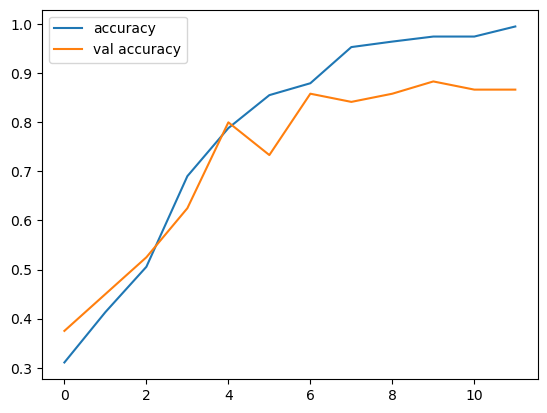

In [27]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

## Loss function comparison

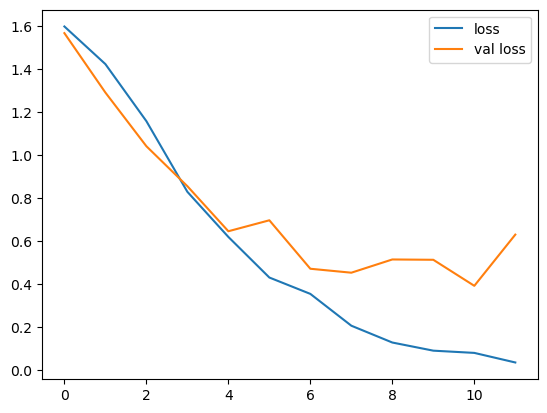

In [29]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Predicting the model with the test data

In [30]:
y_pred = model.predict(x_test, batch_size=32, verbose=1)
print(y_pred.shape)

10/10 [==============================] - 0s 11ms/step
(298, 5)


In [63]:
df_probs_all = pd.DataFrame(y_pred,columns=['business', 'entertainment', 'politics', 'sport', 'tech'])
df_probs_all.head()

business  entertainment  politics         sport      tech
0  6.565750e-07   9.968882e-01  0.001721  1.376140e-03  0.000014
1  9.976066e-01   1.557698e-06  0.002117  4.477928e-07  0.000275
2  1.816078e-05   9.238724e-01  0.002892  7.300685e-02  0.000210
3  9.985368e-01   7.321296e-07  0.001183  3.167171e-07  0.000279
4  9.956684e-01   2.574386e-06  0.003610  6.586340e-07  0.000719

## Cateogry with all the probabilities

In [64]:
def top_5_predictions(df, N):
    cols = df.columns[:-1].tolist()
    a    = df[cols].to_numpy().argsort()[:, :-N-1:-1]
    c    = np.array(cols)[a]
    d    = df[cols].to_numpy()[np.arange(a.shape[0])[:, None], a]
    df1  = pd.DataFrame(c).rename(columns=lambda x : f'max_{x+1}_col')
    predicted_genres = df1["max_1_col"] + ' ' + df1["max_2_col"]+ ' ' +df1["max_3_col"]+ ' ' + df1["max_4_col"]
    return predicted_genres

In [65]:
pred_gen = top_5_predictions(df_probs_all, 5)
pred_gen

0      entertainment politics sport business
1      business politics entertainment sport
2      entertainment sport politics business
3      business politics entertainment sport
4      business politics entertainment sport
                       ...                  
293    politics entertainment business sport
294    business politics entertainment sport
295    politics business entertainment sport
296    sport entertainment politics business
297    sport entertainment politics business
Length: 298, dtype: object

In [66]:
final_results = pd.DataFrame(columns=['text', 'keywords'])

In [67]:
for index, txt in enumerate(x_test):
    final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)

/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_6019/3026006548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)
/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_6019/3026006548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)
/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_6019/3026006548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)
/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipy

In [68]:
final_results

text  \
0    [2, 1, 21, 41, 6, 2, 2, 1, 7, 44, 1, 4, 1, 80,...   
1    [86, 6, 1, 221, 7, 21, 4, 11, 20, 2, 5, 7, 14,...   
2    [232, 1, 3, 18, 9, 1, 285, 1, 1, 24, 78, 5, 32...   
3    [1, 138, 51, 7, 1, 59, 251, 2, 92, 1, 210, 66,...   
4    [3, 1, 3, 325, 15, 3, 232, 1, 74, 58, 1, 15, 2...   
..                                                 ...   
293  [7, 325, 7, 6, 156, 1, 252, 231, 6, 1, 23, 19,...   
294  [7, 1, 3, 14, 82, 86, 1, 7, 1, 287, 15, 201, 2...   
295  [3, 6, 4, 41, 36, 66, 138, 5, 220, 4, 1, 7, 66...   
296  [75, 2, 155, 78, 5, 11, 17, 4, 309, 58, 11, 16...   
297  [298, 287, 59, 67, 138, 246, 6, 217, 13, 15, 2...   

                                  keywords  
0    entertainment politics sport business  
1    business politics entertainment sport  
2    entertainment sport politics business  
3    business politics entertainment sport  
4    business politics entertainment sport  
..                                     ...  
293  politics entertainment business sport  
294  business politics entertainment sport  
295  politics business entertainment sport  
296  sport entertainment politics business  
297  sport entertainment politics business  

[298 rows x 2 columns]

In [69]:
bbc_text = ["""
The US says China will face harsh "consequences" if it aids Russia in its invasion of Ukraine, according to US media reports.
Unnamed officials reportedly told multiple US news outlets that Russia asked China to provide military assistance after it began the invasion.
The Chinese embassy in Washington said it was not aware of this request.
The warning comes ahead of a meeting in Rome on Monday between top US and China officials.
Since the start of the crisis Beijing has expressed strong rhetorical support for long-time ally Moscow, but is not publicly known to have provided any military or economic support.
However local media outlets citing US officials, say that Russia has in recent days asked China specifically for military equipment, including drones. China's response to that request is not known.
In a CNN interview, US National Security Adviser Jake Sullivan said they were "communicating directly, privately to Beijing that there will absolutely be consequences for large-scale sanctions evasion efforts or support to Russia to backfill them.
"We will not allow that to go forward and allow there to be a lifeline to Russia from these economic sanctions from any country, anywhere in the world."
He added that while the US believed China was aware that Russian leader Vladimir Putin was "planning something" before the invasion happened, Beijing "may not have understood the full extent of it".
"Because it's very possible that [Mr] Putin lied to them the same way that he lied to Europeans and others," Mr Sullivan said.
Mr Sullivan is due to meet Yang Jiechi, a member of China's top decision-making body the Politburo and the head of the Central Foreign Affairs Commission, on Monday in Rome.
Reuters news agency quoted a US official as saying that during the meeting Mr Sullivan will spell out the consequences and isolation China would face if it increased support for Russia.
Liu Pengyu, a spokesman for China's embassy in Washington DC, told US media that he had not heard of Russia's request. He added: "The high priority now is to prevent the tense situation from escalating or even getting out of control."
China so far has refrained from condemning Russia for the invasion, and has said Moscow's "legitimate security concerns" should be taken seriously.
Chinese state media and government officials, besides echoing Russia's official line that it is a "special military operation" and not an invasion, have also been repeating Russian disinformation claims about the war in recent days.
But Beijing at the same time has expressed "unwavering support" for Ukraine's sovereignty. It has also called for peace, and has said it is ready to help end the war through diplomacy. Several countries have urged China to do more to stop Russia's invasion.
""",
"""
Ferran Torres scored twice as Barcelona continued their impressive run of form by beating Osasuna for a fourth La Liga win in a row.
Former Manchester City striker Torres opened the scoring early on from the penalty spot after Gavi was fouled.
He got his second soon after with a clinical finish following a great through ball by Ousmane Dembele.
Pierre-Emerick Aubameyang stabbed in from another Dembele assist before substitute Riqui Puig added a fourth.
The 22-year-old showed great composure after his initial shot had been parried, taking the ball round the goalkeeper and cutting inside two defenders before curling in.
Aubameyang's goal, meanwhile, was his fifth in six La Liga games since joining from Arsenal, making him the second-fastest Barcelona player to reach five goals in the competition in the 21st century, after Samuel Eto'o in 2004 and Zlatan Ibrahimovic in 2009.
The win moved Barcelona up to third on 51 points, although they remain way off the pace in the title battle with leaders Real Madrid on 63 points.
"""
]

In [72]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(bbc_text))
tokenized_list_real = tokenizer.texts_to_sequences(bbc_text)

In [73]:
x_real = pad_sequences(tokenized_list_real, maxlen=maxlen)
real_preds = model.predict(x_real)

1/1 [==============================] - 0s 14ms/step


In [74]:
real_preds = pd.DataFrame(real_preds,columns=['business', 'entertainment', 'politics', 'sport', 'tech'])
real_preds

business  entertainment  politics     sport          tech
0  0.090524       0.249975  0.268537  0.005129  3.858348e-01
1  0.000005       0.018741  0.000027  0.981226  7.393775e-07

In [75]:
real_preds = top_5_predictions(real_preds, 5)
real_preds

0    politics entertainment business sport
1    sport entertainment politics business
dtype: object

In [39]:
tokenized_list_train

[[2,
  18,
  367,
  1,
  230,
  754,
  2,
  27,
  1,
  673,
  249,
  109,
  3,
  475,
  1,
  3,
  1,
  63,
  792,
  3,
  203,
  35,
  12,
  701,
  301,
  13,
  1,
  461,
  18,
  5,
  525,
  17,
  100,
  225,
  11,
  662,
  19,
  5,
  2,
  1,
  510,
  7,
  19,
  65,
  41,
  7,
  633,
  4,
  43,
  23,
  45,
  16,
  9,
  5,
  66,
  67,
  633,
  6,
  17,
  6,
  593,
  4,
  708,
  75,
  9,
  2,
  20,
  43,
  1,
  475,
  21,
  1,
  21,
  6,
  530,
  4,
  37,
  2,
  54,
  3,
  32,
  344,
  17,
  633,
  12,
  701,
  382,
  45,
  994,
  80,
  6,
  1,
  673,
  249,
  43,
  574,
  1,
  227],
 [487,
  8,
  696,
  633,
  23,
  487,
  2,
  279,
  6,
  301,
  7,
  227,
  1,
  18,
  28,
  149,
  100,
  137,
  68,
  21,
  1,
  49,
  249,
  6,
  695,
  180,
  75,
  14,
  6,
  1,
  664,
  693,
  22,
  75,
  262,
  67,
  54,
  2,
  129,
  5,
  516,
  24,
  23,
  100,
  6,
  4,
  21,
  1,
  673,
  249,
  510,
  7,
  68,
  105,
  50,
  4,
  604,
  249,
  633,
  23,
  45,
  6,
  1,
  442,
  7,
  574,
  68,
 